In [1]:
using CSV
using DataFrames
using Plots
using StatsPlots, Statistics
df = DataFrame(CSV.File("resultados_all.csv"))

,C,T,N,Kmax,Jmin,Tempo,HMenorJ,seed,O
,Int64,Float64,Int64,Int64,Float64,Float64,Bool,Int64,Bool
1,10,0.1,10000,50,6.49338,0.817726,0,1,1
2,10,0.1,10000,50,6.49338,0.0002269,0,2,1
3,10,0.1,10000,50,6.49338,0.0001433,0,3,1
4,10,0.1,10000,50,6.49338,0.0001187,0,4,1
5,10,0.1,10000,50,6.49338,6.04e-5,0,5,1
6,10,0.1,10000,50,6.49338,6.65e-5,0,6,1
7,10,0.1,10000,50,6.49338,8.03e-5,0,7,1
8,10,0.1,10000,50,6.49338,0.0001239,0,8,1
9,10,0.1,10000,50,6.49338,0.0001125,0,9,1


In [6]:
for row in csv_reader
    println("values: $(row.C), $(row.T), $(row.HMenorJ)")
end

values: 5, 1, false
values: 5, 1, false
values: 5, 1, false
values: 5, 1, false
values: 5, 1, false
values: 5, 1, true
values: 5, 1, true
values: 5, 1, true
values: 5, 1, true
values: 5, 1, true


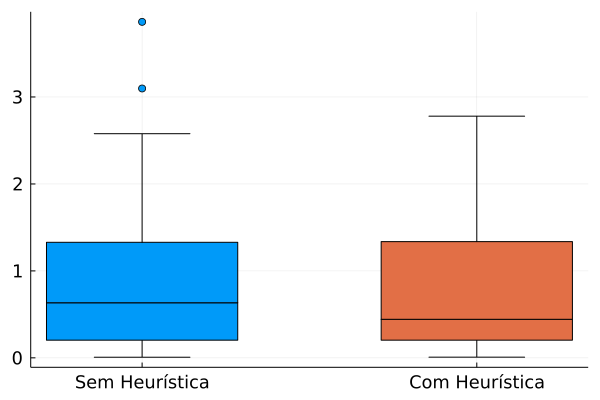

In [2]:
tempos = []
for C in [10, 20, 40, 60, 80, 100, 150, 200, 250]
    # calculate summary statistics
    data = df[df.C .== C .&& df.HMenorJ .== false, :].Tempo
    data_mean, data_std = mean(data), std(data)

    # identify outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off

    append!(tempos, data[data .< upper .&& data .> lower]./data_mean)
end

tempos2 = []
for C in [10, 20, 40, 60, 80, 100, 150, 200, 250]
    # calculate summary statistics
    data = df[df.C .== C .&& df.HMenorJ .== true, :].Tempo
    data_mean, data_std = mean(data), std(data)

    # identify outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off

    append!(tempos2, data[data .< upper .&& data .> lower]./data_mean)
end
boxplot(["Sem Heurística" "Com Heurística"], [tempos, tempos2],tempos,leg=false,ytickfontsize=12,xtickfontsize=12,ylabelfontsize=12)

# ylabel!("Tempo normalizado")
# savefig("comparacao_tempos.png")

In [85]:
tempos = []
for C in [10, 20, 40, 60, 80, 100, 150, 200, 250]
    # calculate summary statistics
    data = df[df.C .== C .&& df.HMenorJ .== false, :].Jmin
    data_mean, data_std = mean(data), std(data)

    # identify outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off

    append!(tempos, data[data .< upper .&& data .> lower]./data_mean)
end

tempos2 = []
for C in [10, 20, 40, 60, 80, 100, 150, 200, 250]
    # calculate summary statistics
    data = df[df.C .== C .&& df.HMenorJ .== true, :].Jmin
    data_mean, data_std = mean(data), std(data)

    # identify outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off

    append!(tempos2, data[data .< upper .&& data .> lower]./data_mean)
end
boxplot(["Sem Heurística" "Com Heurística"], [tempos, tempos2],tempos,leg=false,ytickfontsize=12,xtickfontsize=12,ylabelfontsize=12)

ylabel!("Jmin normalizado")
savefig("comparacao_jmin.png")

In [103]:
for C in [10, 20, 40, 60, 80, 100, 150, 200, 250]
    # calculate summary statistics
    data = df[df.C .== C .&& df.HMenorJ .== false, :].O
#     data_mean, data_std = mean(data), std(data)

    # identify outliers
#     cut_off = data_std * 3
#     lower, upper = data_mean - cut_off, data_mean + cut_off
    
#     Js = data[data .< upper .&& data .> lower]

    println(C, " - ", sum(data)/length(data)*100)
end
println()
for C in [10, 20, 40, 60, 80, 100, 150, 200, 250]
    # calculate summary statistics
    data = df[df.C .== C .&& df.HMenorJ .== true, :].O
#     data_mean, data_std = mean(data), std(data)

    # identify outliers
#     cut_off = data_std * 3
#     lower, upper = data_mean - cut_off, data_mean + cut_off
    
#     Js = data[data .< upper .&& data .> lower]

    println(C, " - ", sum(data)/length(data)*100)
end

10 - 100.0
20 - 100.0
40 - 74.0
60 - 33.5
80 - 11.5
100 - 5.0
150 - 1.0
200 - 1.3333333333333335
250 - 0.5

10 - 100.0
20 - 100.0
40 - 74.0
60 - 31.0
80 - 10.5
100 - 2.5
150 - 0.0
200 - 0.0
250 - 0.0


In [4]:
println()
for C in [10, 20, 40, 60, 80, 100, 150, 200, 250]
    data = df[df.C .== C .&& df.HMenorJ .== false, :].Tempo
    println(C, " - ", sum(data)/length(data))
end

println()
for C in [10, 20, 40, 60, 80, 100, 150, 200, 250]
    data = df[df.C .== C .&& df.HMenorJ .== true, :].Tempo
    println(C, " - ", sum(data)/length(data))
end


10 - 0.008329663000000003
20 - 0.010233706999999998
40 - 0.031508009000000003
60 - 0.20985301099999998
80 - 0.280092106
100 - 0.56445713325
150 - 1.473886847
200 - 7.059081931333333
250 - 33.389167112

10 - 0.008330658000000001
20 - 0.009943644000000003
40 - 0.028899750999999994
60 - 0.18510656099999998
80 - 0.2940997755
100 - 0.594137284
150 - 1.4762660499999998
200 - 7.275670453999999
250 - 35.54990062466666
